### 裁切音檔

In [1]:
import librosa
import librosa.display
import soundfile as sf
from scipy.io import wavfile as wav
import os
import pandas as pd
from matplotlib import pyplot as plt
import glob 
from pathlib import Path
import numpy as np
import soundfile as sf
import shutil
from sklearn.preprocessing import minmax_scale

### 檢查amplitude

22050
0.84747314
[0.2554195  0.92879819 1.13777778 1.36997732 2.2523356  2.67029478
 2.78639456 3.0185941  3.2275737  4.13315193 4.36535147 4.59755102]


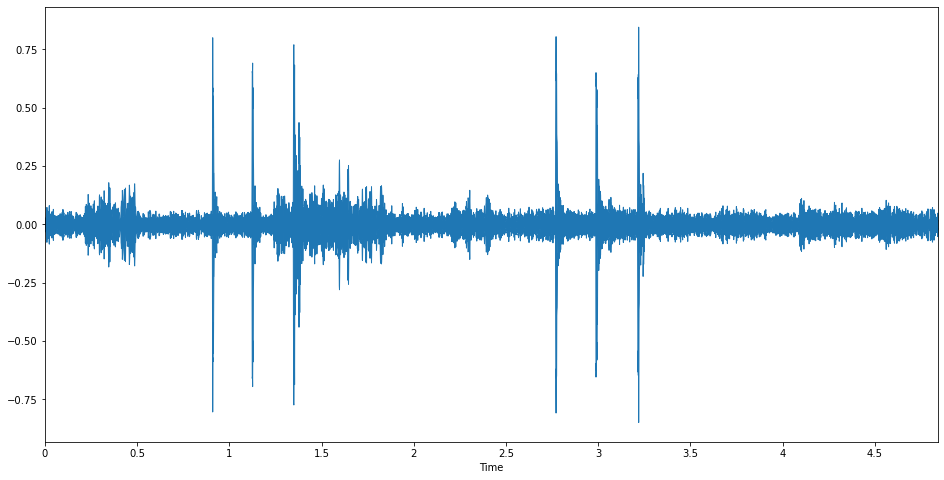

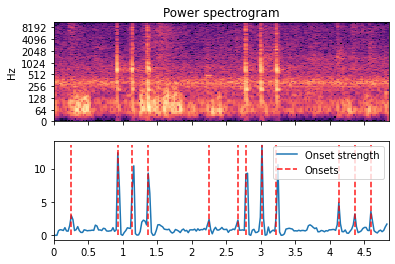

In [2]:
raw_data_path = "../data_origin/20240511_phone/column/column1.wav"
# raw_data_path = "../data/PA_sound_cut/20230314/clean/meatdrum/drum6.wav"
raw_data, sr = librosa.load(raw_data_path)
print(sr)
plt.figure(figsize=(16, 8))
# raw_data = raw_data[24500: 25500]
print(max(raw_data))
librosa.display.waveplot(raw_data, sr)
# librosa.display.waveplot(raw_data[25*2205:28*2205], sr)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data[29*2205:32*2205], sr)

o_env = librosa.onset.onset_strength(y=raw_data, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
import matplotlib.pyplot as plt
D = np.abs(librosa.stft(raw_data))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()
print(times[onset_frames])

### Wave to Clips
先用 onset 找出所有 peak，然後取所有 peak 值大於 amplitude

In [7]:
sec = 0.1          # 目標音檔長度
sample_point = int(sr * sec)
peak_thres = 0.5


# 每次皆須更動的資料
getPath = "../data_origin/20240511_phone/"
savePath = "./data/stickData/"
pineTypes = ["meat/", "column/", "drum/"]
os.system("rm -rf " + savePath)

for pineType in pineTypes:
    DataNum = 0
    # 開啟目標資料夾
    path = getPath + pineType
    saveFilePath = savePath + pineType
    if not os.path.exists(saveFilePath):
        os.makedirs(saveFilePath)
    files= Path(path).glob('**/*.wav')
    for file in files:
        if not os.path.isdir(file):                               #判斷是否是資料夾，不是資料夾才打開
#             DataNum = 0
            y, sr = librosa.load(file)
            o_env = librosa.onset.onset_strength(y=y, sr=sr)
            times = librosa.times_like(o_env, sr=sr)
            onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
            raw_peak_time = list(filter(lambda x: x >= sec , times[onset_frames]))
            peak_idx = [int(item * sr) - 500 for item in raw_peak_time]
            cor_pick_idx = []
            for i in peak_idx:
                cur_idx = i
                over_thres = 0
                while cur_idx < len(y) and cur_idx < (i + sample_point):
                    if (y[cur_idx] > peak_thres):
                        over_thres += 1
                    if (over_thres >= 3):
                        cor_pick_idx.append(i)
                        break
                    cur_idx += 1
            print(cor_pick_idx)

            for i in cor_pick_idx:
                begin = i
                end = i + sample_point
                clip_cover = y[begin:end]
                name = str(file).split('/')[-1].split('.')[0]
                # saveFileName = saveFilePath + name + "_" + str(DataNum) + ".wav"
                saveFileName = saveFilePath + str(DataNum) + ".wav"
                # print(name + "_" + str(DataNum) + ".wav")
                sf.write(saveFileName, clip_cover, sr)
                DataNum += 1

[68108, 73228]
[]
[23564, 28684]
[17420]
[18956, 24076]
[28684, 33804, 62988, 68108]
[21004, 26635, 65036]
[26635]
[55820]
[62988, 68108, 73228]
[55820, 60939]
[14859, 19980]
[21004, 26124, 59916]
[]
[15372, 19980, 24588, 53260]
[12300, 58892, 64012]
[14348]
[57868, 62988]
[]
[]
[34316, 64524]
[]
[17932, 55820, 57868, 62988, 68108]
[]
[]
[61452]
[29196, 70156]
[24076, 57868, 62988]
[54284]
[31756, 69644]
[18444, 23051, 27660, 61452, 66572]
[20492]
[]
[18956, 28684, 57356, 62476]
[91148, 127500, 132620]
[23564, 32780]
[22028]
[19980]
[17932, 23051, 27660, 54796, 59916]
[23564]
[16396, 55308, 60428, 65548]
[]
[]
[22028, 31756, 59404, 64524, 69644]
[24076, 29196, 60428, 65548]
[]
[23051, 28172, 56332, 61452, 66572]
[60428, 70668]
[53771, 64524]
[]
[26124]
[20492, 66572]
[30732, 64524, 69644]
[]
[18444, 56844, 67084]
[60939]
[60428, 65548]
[16908, 26635, 55820, 66060]
[65548]
[]
[28684, 58380, 63500]
[19468, 24588, 61964, 67084]
[19980, 25100, 64012]
[22028]
[19468, 24588, 57868, 62988, 68

[15884, 21004, 26124, 60939, 71180]
[24076, 62988, 73228]
[17420, 22540, 57868, 62988, 68108]
[21516, 31244, 63500, 73228]
[73228]
[20492, 59916, 65036]
[25612, 30732, 35340, 65548, 76300]
[22028, 27148, 56844, 61964]
[33292, 68620, 73740]
[27660, 61452, 66572, 71692]
[16396, 26124, 60939, 66060]
[28172, 62476]
[]
[32780]
[19468, 29196, 59404, 69644]
[21004, 25612, 30732, 69644, 74764, 79884]
[21004, 26124, 31244, 65036, 70156, 74764]
[25100]
[18956, 24076, 62988, 72716]
[16396, 21516, 26635, 56844, 61964, 67084]
[18444, 62988, 72716]
[31244]
[18956, 29708, 61452, 72204]
[14859, 19468, 24588, 55308, 60428, 65548]
[27148, 66060]
[25612, 30732, 62476, 67596]
[16908, 58892, 68620]
[27148, 61964]
[25100, 30219, 56332, 61452, 66572]
[28172, 57868, 63500]
[18444, 23564, 28172, 65548, 70668]
[]
[15372, 20492, 25100]
[15884, 21004, 57868, 62476, 67596]
[16908, 22028, 26635, 65548, 70156]
[18956, 23564, 28684, 65036]
[34316, 70156, 75276, 80396]
[24588, 29708, 61964, 67596, 72716]
[14348, 19468

Onset切割法

In [7]:
# sec = 0.3            # 目標音檔長度
# sample_point = int(22050 * sec)

# # 每次皆須更動的資料
# path = "../../PA_sound_origin/20230412/drum/"
# saveFilePath = "../../PA_sound_cut/20230412/cut/drum/"

# # 開啟目標資料夾
# files= Path(path).glob('**/*.wav')
# for file in files:
#     if not os.path.isdir(file):                               #判斷是否是資料夾，不是資料夾才打開
#         DataNum = 0
#         y, sr = librosa.load(file)
#         o_env = librosa.onset.onset_strength(y=y, sr=sr)
#         times = librosa.times_like(o_env, sr=sr)
#         onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
#         raw_peak_time = list(filter(lambda x: x >= 2.3 and x <= 3.1, times[onset_frames]))
#         peak_time = []
#         last_peak_time = raw_peak_time[0]
#         peak_time.append(last_peak_time)
#         # print(last_peak_time)
#         for i in range(1, len(raw_peak_time)):
#             # print(last_peak_time + 0.25)
#             # print(raw_peak_time[i])
#             if last_peak_time + 0.3 < raw_peak_time[i]:
                
#                 peak_time.append(raw_peak_time[i])
#                 last_peak_time = raw_peak_time[i]
#         peak_idx = [int(item * 22050) - 1000 for item in peak_time]
#         # print(len(peak_idx))
#         for idx in peak_idx:
#             begin = idx
#             end = idx + sample_point
#             clip = y[begin:end]
#             name = str(file).split('/')[-1].split('.')[0]
#             saveFileName = saveFilePath + name + "_" + str(DataNum) + ".wav"
#             print(saveFileName)
#             sf.write(saveFileName, clip, sr)
#             DataNum += 1
#             last_idx = idx

Peak切割法

In [8]:
# threshold = 0.4     # 判斷是否為敲擊聲  drum_new = 0.45 meat = 0.2 meat_new = 0.4
# start_sec = 1.2      # 起始檢查位置
# sec = 0.3            # 目標音檔長度

# sample_point = int(22050 * sec)

# # 每次皆須更動的資料
# path = "../../PA_sound_origin/20230314/meat_new/"
# saveFilePath = "../../PA_sound_cut/20230314/cut/meat_new/"

# # 開啟目標資料夾
# files= Path(path).glob('**/*.wav')
# for file in files:
#     if not os.path.isdir(file):                               #判斷是否是資料夾，不是資料夾才打開
#         fileSize = os.path.getsize(file)
#         if fileSize > 100000 and fileSize < 180000:            # 保資料大小正常
#             DataNum = 0
#             raw_data, sr = librosa.load(file)
#             i = int(22050 * start_sec)
#             while i < len(raw_data) - sample_point:           # 保證資料不會不夠切(限制尾端)

#                 # 裁切
#                 if raw_data[i] >= threshold:
#                     begin = i
#                     end = i + sample_point
#                     max_data = 0
#                     for j in range(begin, end):
#                         if j < len(raw_data):
#                             if raw_data[j] > max_data:
#                                 max_data = raw_data[j]
#                                 max_idx = j
#                         else:
#                             break
#                     if max_idx > len(raw_data) - sample_point:    # 保證資料不會不夠切(限制尾端)
#                         break
#                     begin = max_idx
#                     end = max_idx + sample_point
#                     clip_cover = raw_data[begin:end]
#                     name = str(file).split('/')[-1].split('.')[0]
#                     saveFileName = saveFilePath + name + "_" + str(DataNum) + ".wav"
#                     print(saveFileName)
#                     sf.write(saveFileName, clip_cover, sr)
#                     i += sample_point
#                     DataNum += 1
#                 i += 1

### Normalize

In [44]:
# path = "../data/smartStickCut/drum/2024-04-28/"
# saveFilePath = "../data/smartStickNorm/drum/2024-04-28/"
# path = "../data/smartStickCut/column/2024-04-28/"
# saveFilePath = "../data/smartStickNorm/column/2024-04-28/"
path = "../data/smartStickCut/meat/2024-04-28/"
saveFilePath = "../data/smartStickNorm/meat/2024-04-28/"

# 開啟目標資料夾
if not os.path.exists(saveFilePath):
    os.makedirs(saveFilePath)

files= os.listdir(path)
for file in files:
    raw_data, sr = sf.read(path + file)
    # print(drum_path + file)
    raw_data /= np.max(np.abs(raw_data), axis=0)
#     data = minmax_scale(raw_data)
    sf.write(saveFilePath + file, raw_data, sr)

In [ ]:
# raw_data_path = "../../../../aicup2023-Multimodal-Pathological-Voice-Classification/Training Dataset/training_voice_data/1102sa2.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

In [ ]:
# raw_data_path = "../../../../aicup2023-Multimodal-Pathological-Voice-Classification/Training Dataset/training_voice_data/1201ji7.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

In [ ]:
# raw_data_path = "../../../../aicup2023-Multimodal-Pathological-Voice-Classification/Training Dataset/training_voice_data/1100dpi.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

In [ ]:
# raw_data_path = "../../../../aicup2023-Multimodal-Pathological-Voice-Classification/Training Dataset/training_voice_data/1201qik.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

In [ ]:
# raw_data_path = "../../PA_sound_origin/sound20.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

In [ ]:
# raw_data_path = "../../PA_sound_origin/noise8.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

# raw_data_path = "../../PA_sound_origin/noise9.wav"
# raw_data, sr = librosa.load(raw_data_path)
# plt.figure(figsize=(16, 8))
# librosa.display.waveplot(raw_data, sr)

Divide Noise